In [1]:
# READ THIS
# Exploratory data analysis is the first six cells
# Cells 7 and onward are for the data story

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d = pd.read_csv('avocado.csv')
d = d.drop('Unnamed: 0', axis=1)

In [3]:
d['Date'] = pd.to_datetime(d['Date'])
d['month'] = d['Date'].dt.month
d['year'] = d['Date'].dt.year
m = d.groupby(['year','month']).mean().reset_index()

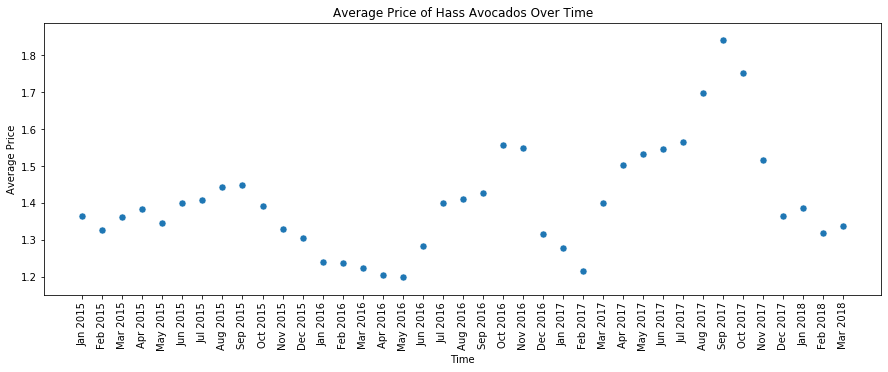

In [4]:
# Average price over time

sns.color_palette("tab10")
fig, ax = plt.subplots(figsize=(15,5))
sns.scatterplot(x=m.index.values, y='AveragePrice', data=m, s=50)
plt.title('Average Price of Hass Avocados Over Time')
xxx = ['Jan 2015','Feb 2015','Mar 2015','Apr 2015','May 2015','Jun 2015','Jul 2015','Aug 2015','Sep 2015','Oct 2015','Nov 2015','Dec 2015','Jan 2016','Feb 2016','Mar 2016','Apr 2016','May 2016','Jun 2016','Jul 2016','Aug 2016','Sep 2016','Oct 2016','Nov 2016','Dec 2016','Jan 2017','Feb 2017','Mar 2017','Apr 2017','May 2017','Jun 2017','Jul 2017','Aug 2017','Sep 2017','Oct 2017','Nov 2017','Dec 2017','Jan 2018','Feb 2018','Mar 2018']
ax.set_xlabel('Time')
plt.xticks(ticks=range(39), labels=xxx, rotation=90)
ax.set_ylabel('Average Price')
plt.show()

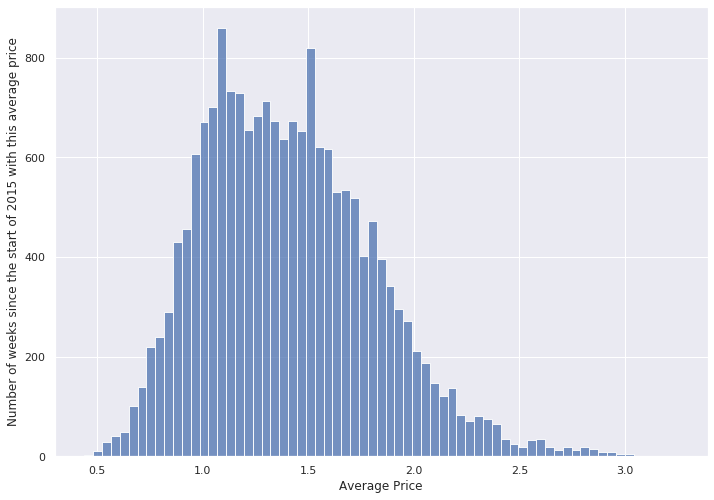

In [5]:
# Histogram of average price

sns.set(rc={'figure.figsize':(11.7,8.27)})
ff = sns.histplot(data=d['AveragePrice'])
ff.set_xlabel('Average Price')
ff.set_ylabel('Number of weeks since the start of 2015 with this average price')
plt.show()

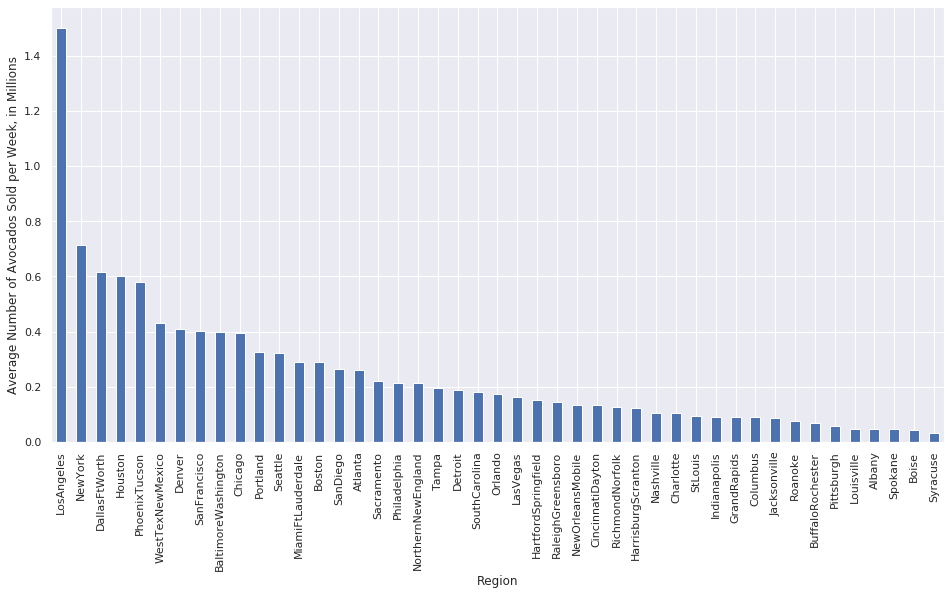

In [6]:
# Bar chart of sales by region

f = d[['region','Total Volume']].groupby(['region']).mean().sort_values('Total Volume', ascending=False)/1000000
# Remove overlapping regions; some are larger because they are conglomerates of many other regions
f = f.drop(['TotalUS','West','SouthCentral','Northeast','Southeast','GreatLakes','Midsouth','Plains','California'])

fig = f.plot.bar(figsize=(16,8))
fig.set_xlabel('Region')
fig.set_ylabel('Average Number of Avocados Sold per Week, in Millions')
fig.get_legend().remove()
plt.show()

In [7]:
# From here on, code pertains to the data story

# Find out the regions with the highest and lowest average per-unit avocado prices
d.groupby('region').mean()['AveragePrice'].sort_values()

# Highest average price (per avocado, over the whole time frame, which
#     is January 2015 to March 2018):  HartfordSpringfield
# Four regions with lowest average price, from lowest to fourth lowest:
    # Houston
    # DallasFtWorth
    # (SouthCentral doesn't count since it's a bigger region)
    # CincinnatiDayton
    # Nashville
    
# Make a dataframe with only the regions of interest
simpled = d[['Date','AveragePrice','region','year','month']][d['region'].isin(['Houston','DallasFtWorth','CincinnatiDayton','Nashville','HartfordSpringfield'])]

# Smooth out the lines by doing a monthly instead of a weekly average
bymonth = simpled.groupby(['region','year','month']).mean('AveragePrice').reset_index()
bymonth['day'] = 1
bymonth['datetime'] = pd.to_datetime(bymonth[['year', 'month', 'day']])

# Rearrange the dataframe so the plot legend is in the logical order
cin = bymonth[bymonth['region']=='CincinnatiDayton']
nash = bymonth[bymonth['region']=='Nashville']
hart = bymonth[bymonth['region']=='HartfordSpringfield']
dal = bymonth[bymonth['region']=='DallasFtWorth']
hou = bymonth[bymonth['region']=='Houston']
bymonth_inorder = pd.concat([hart,nash,cin,dal,hou], axis=0)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


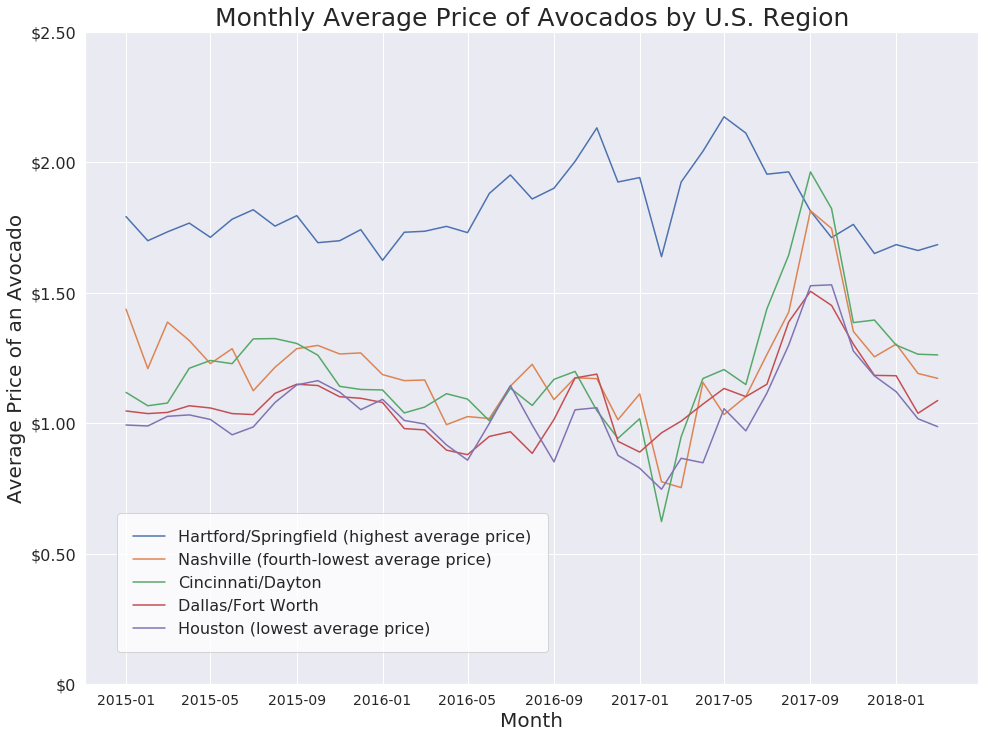

In [8]:
# Now make a line plot over time with five different colored lines, one for the four
# cheapest regions and one for the most expensive. This shows how avocado prices change over time
# in the cheap regions vs. in the most expensive one.

sns.set(rc={'figure.figsize':(16,12)})
plt.ylim(0, 2.5)
ax = sns.lineplot(data=bymonth_inorder, x='datetime', y='AveragePrice', hue='region', errorbar=None, sort=False)
plt.ylabel('Average Price of an Avocado', fontsize=20)
plt.xlabel('Month', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(ticks=[0. , 0.5, 1. , 1.5, 2. , 2.5], labels=['$0', '$0.50', '$1.00', '$1.50', '$2.00', '$2.50'], fontsize=16)
plt.title('Monthly Average Price of Avocados by U.S. Region', fontsize=25)
plt.legend(labels=['Hartford/Springfield (highest average price)','Nashville (fourth-lowest average price)','Cincinnati/Dayton','Dallas/Fort Worth','Houston (lowest average price)'],loc='lower left', prop={'size': 16}, borderaxespad=2, borderpad=1, facecolor='white')
plt.show()